In [26]:
from reinforcement_training import *
from notebook_game_helper import *

In [27]:
# lets train a DQN model!
# make the model
hiddens = [{"size":10,"activation":"relu"},
#             {"size":20,"activation":"relu"},
            {"size":10,"activation":"relu"}]
# make an optimizer
from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
optimizer = sgd(lr = 0.001)
# optimizer = Adagrad()
# optimizer = RMSprop()
# optimizer = Adadelta()
# optimizer = Adam()
model = baseline_model(optimizer, hiddens)

In [28]:
# prepare the game for training model
training_game_size = 8
training_game = NeuralNaviGame(training_game_size,
                                training_game_size,
                                model,
                                model_type = "reinforcement")
training_game.setup()

In [31]:
training_episodes = 10000
steps = 10
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Episode 9999, Wins: 0, Replay Loss: 0.137: 100%|██████████| 10000/10000 [05:02<00:00, 33.07it/s]] 


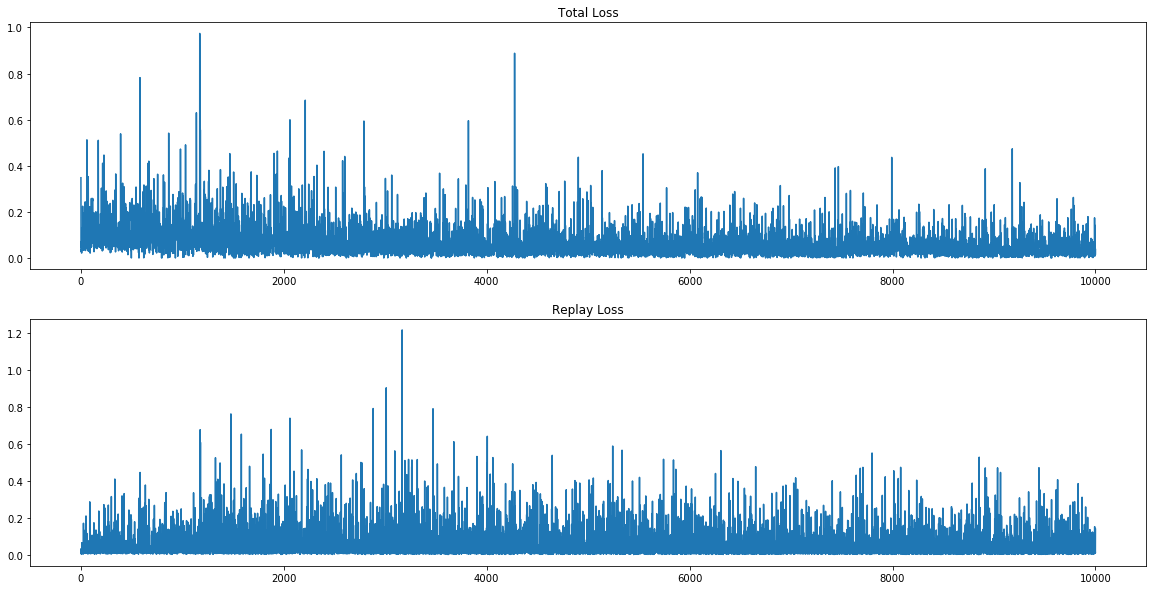

In [32]:
# plot learning info
log = [output['log'], output['replays']]
f, axarr = pl.subplots(2, 1, figsize = (20, 10))
# f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
x = np.linspace(0, len(log[0]), len(log[0]))
axarr[0].plot(x, log[0])
axarr[0].set_title('Total Loss')
axarr[1].plot(x, log[1])
axarr[1].set_title('Replay Loss')
# axarr[2].plot(x, np.log(log[0]))
# axarr[2].set_title('Log Total Loss')
# axarr[3].plot(x, np.log(log[1]))
# axarr[3].set_title('Log Replay Loss')
f.subplots_adjust(hspace=0.2)

pl.plot()
pl.savefig("rl_curve_x.png")
pl.show()

In [33]:
ipt = training_game.Navigator.strategy.get_input(0)
predict = training_game.Navigator.strategy.get_quality()
reward = training_game.Navigator.strategy.get_reward()
print(ipt, predict, reward)

[0, 1, 6, 3, 0] [[-2.59017372]] -0.01


In [34]:
# prepare the game for validating model
val_game_size = training_game_size
val_game = NeuralNaviGame(val_game_size,
                                val_game_size,
                                model,
                                model_type = "reinforcement")
val_game.setup()

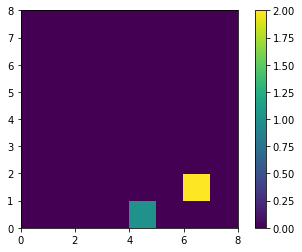

None

In [35]:
animate_game(val_game, n = 20)